In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
outfile = "runMaria-mouse-IGH-MOUSE-shared-clones.xlsx"
ptfile = "20201013-DataSheet-Maria-mouse.csv"

## Read data

In [3]:
df_pt = pd.read_csv(ptfile, sep=",", skiprows=20)
df_pt = df_pt.rename(columns={'Sample': 'SampleInfo'})
df_pt["Sample"] = df_pt["Sample_Name"] + "_" + df_pt["Nr"]
df_pt.head()

,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Run,Nr,Sample_Project,Species,Chain,Patient,SampleInfo,UMI,filename,Sample
0,MSmm-01,MSmm-01,NaN,NaN,NaN,NaN,NaN,NaN,runXXX-20201013-maria-mouse,S1,GC,mouse,BCRh,Unknown,MSmm-01,no,MSmm-01_S1_L001_R1_001.fastq.gz,MSmm-01_S1
1,MSmm-02,MSmm-02,NaN,NaN,NaN,NaN,NaN,NaN,runXXX-20201013-maria-mouse,S2,GC,mouse,BCRh,Unknown,MSmm-02,no,MSmm-02_S2_L001_R1_001.fastq.gz,MSmm-02_S2
2,MSmm-03,MSmm-03,NaN,NaN,NaN,NaN,NaN,NaN,runXXX-20201013-maria-mouse,S3,GC,mouse,BCRh,Unknown,MSmm-03,no,MSmm-03_S3_L001_R1_001.fastq.gz,MSmm-03_S3
3,MSmm-04,MSmm-04,NaN,NaN,NaN,NaN,NaN,NaN,runXXX-20201013-maria-mouse,S4,GC,mouse,BCRh,Unknown,MSmm-04,no,MSmm-04_S4_L001_R1_001.fastq.gz,MSmm-04_S4
4,MSmm-05,MSmm-05,NaN,NaN,NaN,NaN,NaN,NaN,runXXX-20201013-maria-mouse,S5,GC,mouse,BCRh,Unknown,MSmm-05,no,MSmm-05_S5_L001_R1_001.fastq.gz,MSmm-05_S5


In [4]:
myfiles = [x for x in os.listdir(".") if x.startswith("cdr3-clones")]
myfiles

['cdr3-clones-GC-IGH_MOUSE-after-reassignment.csv']

In [5]:
cols = ['Sample', 'cdr3pep', 'freq']
df = pd.read_csv(myfiles[0], sep="\t")
df = df[cols]
df.head()

,Sample,cdr3pep,freq
0,MSmm-01_S1,CARGGLYWYFDVWGTGTTLT,59
1,MSmm-01_S1,CARRAVVATPYWYFDVWGTGTLLT,43
2,MSmm-01_S1,CKTHDGYYSYWYFDVWGTGTLLT,40
3,MSmm-01_S1,CARRAVVATPYWYFDVWGTGTPLT,38
4,MSmm-01_S1,YWYFDVWGTGTLLT,37


In [6]:
for myfile in myfiles[1:]:
    df_tmp = pd.read_csv(myfile, sep="\t")
    df_tmp = df_tmp[cols]
    df = df.append(df_tmp)
df.tail()

,Sample,cdr3pep,freq
54943,MSmm-05_S5,YWYFDVWGTGTSLT,1
54944,MSmm-05_S5,YYAMDYWGQGTLLT,1
54945,MSmm-05_S5,YYAMDYWGQGTPLT,1
54946,MSmm-05_S5,YYFDYWGQGTLLT,1
54947,MSmm-05_S5,YYFDYWGQGTSLT,1


In [7]:
# Merge pt-table with clones
df = pd.merge(df, df_pt, on="Sample")
df.head()

,Sample,cdr3pep,freq,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Run,Nr,Sample_Project,Species,Chain,Patient,SampleInfo,UMI,filename
0,MSmm-01_S1,CARGGLYWYFDVWGTGTTLT,59,MSmm-01,MSmm-01,NaN,NaN,NaN,NaN,NaN,NaN,runXXX-20201013-maria-mouse,S1,GC,mouse,BCRh,Unknown,MSmm-01,no,MSmm-01_S1_L001_R1_001.fastq.gz
1,MSmm-01_S1,CARRAVVATPYWYFDVWGTGTLLT,43,MSmm-01,MSmm-01,NaN,NaN,NaN,NaN,NaN,NaN,runXXX-20201013-maria-mouse,S1,GC,mouse,BCRh,Unknown,MSmm-01,no,MSmm-01_S1_L001_R1_001.fastq.gz
2,MSmm-01_S1,CKTHDGYYSYWYFDVWGTGTLLT,40,MSmm-01,MSmm-01,NaN,NaN,NaN,NaN,NaN,NaN,runXXX-20201013-maria-mouse,S1,GC,mouse,BCRh,Unknown,MSmm-01,no,MSmm-01_S1_L001_R1_001.fastq.gz
3,MSmm-01_S1,CARRAVVATPYWYFDVWGTGTPLT,38,MSmm-01,MSmm-01,NaN,NaN,NaN,NaN,NaN,NaN,runXXX-20201013-maria-mouse,S1,GC,mouse,BCRh,Unknown,MSmm-01,no,MSmm-01_S1_L001_R1_001.fastq.gz
4,MSmm-01_S1,YWYFDVWGTGTLLT,37,MSmm-01,MSmm-01,NaN,NaN,NaN,NaN,NaN,NaN,runXXX-20201013-maria-mouse,S1,GC,mouse,BCRh,Unknown,MSmm-01,no,MSmm-01_S1_L001_R1_001.fastq.gz


In [8]:
df = df.groupby(["Patient", "Sample", "cdr3pep"]).agg({'freq': sum})
df = df.reset_index()
df.head()

,Patient,Sample,cdr3pep,freq
0,Unknown,MSmm-01_S1,AMDYWGQGTILT,1
1,Unknown,MSmm-01_S1,AMDYWGQGTLVT,1
2,Unknown,MSmm-01_S1,AMDYWGQGTPLT,4
3,Unknown,MSmm-01_S1,AMDYWGQGTPVT,5
4,Unknown,MSmm-01_S1,AMDYWGQGTRLT,3


In [9]:
df_total = df.groupby("Sample").agg({"freq": sum})
df_total = df_total.reset_index()
df_total = df_total.rename(columns={'freq': 'totalreads'})
df_total.head()

,Sample,totalreads
0,MSmm-01_S1,20521
1,MSmm-02_S2,16119
2,MSmm-03_S3,16699
3,MSmm-04_S4,18797
4,MSmm-05_S5,19117


In [10]:
df = pd.merge(df, df_total, on="Sample")
df.head()

,Patient,Sample,cdr3pep,freq,totalreads
0,Unknown,MSmm-01_S1,AMDYWGQGTILT,1,20521
1,Unknown,MSmm-01_S1,AMDYWGQGTLVT,1,20521
2,Unknown,MSmm-01_S1,AMDYWGQGTPLT,4,20521
3,Unknown,MSmm-01_S1,AMDYWGQGTPVT,5,20521
4,Unknown,MSmm-01_S1,AMDYWGQGTRLT,3,20521


In [11]:
df.tail()

,Patient,Sample,cdr3pep,freq,totalreads
54943,Unknown,MSmm-05_S5,YYAMDYWGQGTLLT,1,19117
54944,Unknown,MSmm-05_S5,YYAMDYWGQGTPLT,1,19117
54945,Unknown,MSmm-05_S5,YYFDYWGQGTLLT,1,19117
54946,Unknown,MSmm-05_S5,YYFDYWGQGTSLT,1,19117
54947,Unknown,MSmm-05_S5,YYFDYWGQGTTVT,2,19117


In [12]:
df['perc'] = 100 * df['freq'] / df['totalreads']
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,Unknown,MSmm-01_S1,AMDYWGQGTILT,1,20521,0.004873
1,Unknown,MSmm-01_S1,AMDYWGQGTLVT,1,20521,0.004873
2,Unknown,MSmm-01_S1,AMDYWGQGTPLT,4,20521,0.019492
3,Unknown,MSmm-01_S1,AMDYWGQGTPVT,5,20521,0.024365
4,Unknown,MSmm-01_S1,AMDYWGQGTRLT,3,20521,0.014619


## Determine overlap (shared clones) and the direction

In [13]:
ids = list(df['Sample'].unique())
ids[:10]

['MSmm-01_S1', 'MSmm-02_S2', 'MSmm-03_S3', 'MSmm-04_S4', 'MSmm-05_S5']

In [14]:
def directionShared(df, idA, idB):
    df_A = df[df['Sample'] == idA]
    df_B = df[df['Sample'] == idB]
    df_pair = pd.merge(df_A, df_B, on="cdr3pep")
    sum_A = df_pair["perc_x"].sum()
    sum_B = df_pair["perc_y"].sum()
    if sum_B > sum_A:
        idA, idB = idB, idA
        sum_A, sum_B = sum_B, sum_A
    return(idA, idB, sum_A, sum_B)
directionShared(df, "DO-004V3-P5_S123", "DO-004V3-P8_S127")

('DO-004V3-P5_S123', 'DO-004V3-P8_S127', 0.0, 0.0)

In [15]:
sources = list()
targets = list()
impacts_source = list()
impacts_target = list()
for i in range(len(ids)-1):
    for j in range(i+1, len(ids)):
        idA = ids[i]
        idB = ids[j]
        (source, target, impact_source, impact_target) = directionShared(df, idA, idB)
        sources.append(source)
        targets.append(target)
        impacts_source.append(impact_source)
        impacts_target.append(impact_target)
df_shared = pd.DataFrame({'source': sources, 'target': targets, 'impact_source': impacts_source, 'impact_target': impacts_target})
df_shared.head()

,source,target,impact_source,impact_target
0,MSmm-02_S2,MSmm-01_S1,2.797940,2.217241
1,MSmm-01_S1,MSmm-03_S3,3.737635,2.640877
2,MSmm-01_S1,MSmm-04_S4,3.469616,2.654679
3,MSmm-01_S1,MSmm-05_S5,3.635300,3.154261
4,MSmm-02_S2,MSmm-03_S3,3.288045,2.760644


In [16]:
# Add patient columns for the source and the target
cols = ["Patient", "Sample"]
df_sample_patient = df_pt[cols]
df_shared = pd.merge(df_shared, df_sample_patient, left_on="source", right_on="Sample").rename(columns={"Patient": "patient_source", "Sample": "sample_source"})
df_shared = pd.merge(df_shared, df_sample_patient, left_on="target", right_on="Sample").rename(columns={"Patient": "patient_target", "Sample": "sample_target"})
cols = ["source", "target", "impact_source", "impact_target", "patient_source", "patient_target"]
df_shared = df_shared[cols]
df_shared.head()

,source,target,impact_source,impact_target,patient_source,patient_target
0,MSmm-02_S2,MSmm-01_S1,2.797940,2.217241,Unknown,Unknown
1,MSmm-02_S2,MSmm-03_S3,3.288045,2.760644,Unknown,Unknown
2,MSmm-01_S1,MSmm-03_S3,3.737635,2.640877,Unknown,Unknown
3,MSmm-05_S5,MSmm-03_S3,3.536120,2.766633,Unknown,Unknown
4,MSmm-02_S2,MSmm-04_S4,2.841367,2.127999,Unknown,Unknown


In [17]:
# sort on impact on the target and then on impact of the source
df_shared = df_shared.sort_values(by=["impact_target", "impact_source"], ascending=False)
df_shared = df_shared.reset_index()
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target
0,6,MSmm-05_S5,MSmm-04_S4,3.834284,3.197319,Unknown,Unknown
1,8,MSmm-01_S1,MSmm-05_S5,3.635300,3.154261,Unknown,Unknown
2,9,MSmm-05_S5,MSmm-02_S2,3.290265,3.139153,Unknown,Unknown
3,7,MSmm-03_S3,MSmm-04_S4,3.221750,3.032399,Unknown,Unknown
4,3,MSmm-05_S5,MSmm-03_S3,3.536120,2.766633,Unknown,Unknown


In [18]:
same_pt = list()
for i in range(len(df_shared)):
    if df_shared['patient_source'][i] == df_shared['patient_target'][i]:
        same_pt.append("same")
    else:
        same_pt.append("different")
df_shared["Same patient"] = same_pt
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,6,MSmm-05_S5,MSmm-04_S4,3.834284,3.197319,Unknown,Unknown,same
1,8,MSmm-01_S1,MSmm-05_S5,3.635300,3.154261,Unknown,Unknown,same
2,9,MSmm-05_S5,MSmm-02_S2,3.290265,3.139153,Unknown,Unknown,same
3,7,MSmm-03_S3,MSmm-04_S4,3.221750,3.032399,Unknown,Unknown,same
4,3,MSmm-05_S5,MSmm-03_S3,3.536120,2.766633,Unknown,Unknown,same


In [19]:
df_shared.to_excel(outfile)
print("Wrote", outfile, "to disk")

Wrote runMaria-mouse-IGH-MOUSE-shared-clones.xlsx to disk


## Visualize it

In [20]:
df_shared = df_shared[(df_shared["impact_source"] != 0) & (df_shared["impact_target"] != 0)]
df_shared = df_shared.reset_index()
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,0,6,MSmm-05_S5,MSmm-04_S4,3.834284,3.197319,Unknown,Unknown,same
1,1,8,MSmm-01_S1,MSmm-05_S5,3.635300,3.154261,Unknown,Unknown,same
2,2,9,MSmm-05_S5,MSmm-02_S2,3.290265,3.139153,Unknown,Unknown,same
3,3,7,MSmm-03_S3,MSmm-04_S4,3.221750,3.032399,Unknown,Unknown,same
4,4,3,MSmm-05_S5,MSmm-03_S3,3.536120,2.766633,Unknown,Unknown,same


In [21]:
def makeScatter(x,y,txt,color,xlabel,ylabel,plotfile):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(x, y, color=color)

    for i, txt in enumerate(txt):
        ax.annotate(txt, (x[i], y[i]))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add red dotted line
    ax.plot([-1, 100], [-1, 100], c='w', linestyle=":")
    
    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

In [22]:
f = lambda x,y: x + "->" + y
df_shared['txt'] = [x for x in map(f, df_shared['source'], df_shared['target'])]
df_shared['color'] = "blue"
df_shared.loc[df_shared["Same patient"] == "same", 'color'] = "purple"
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient,txt,color
0,0,6,MSmm-05_S5,MSmm-04_S4,3.834284,3.197319,Unknown,Unknown,same,MSmm-05_S5->MSmm-04_S4,purple
1,1,8,MSmm-01_S1,MSmm-05_S5,3.635300,3.154261,Unknown,Unknown,same,MSmm-01_S1->MSmm-05_S5,purple
2,2,9,MSmm-05_S5,MSmm-02_S2,3.290265,3.139153,Unknown,Unknown,same,MSmm-05_S5->MSmm-02_S2,purple
3,3,7,MSmm-03_S3,MSmm-04_S4,3.221750,3.032399,Unknown,Unknown,same,MSmm-03_S3->MSmm-04_S4,purple
4,4,3,MSmm-05_S5,MSmm-03_S3,3.536120,2.766633,Unknown,Unknown,same,MSmm-05_S5->MSmm-03_S3,purple


Wrote runMaria-mouse-IGH-MOUSE-shared-clones-all.pdf to disk


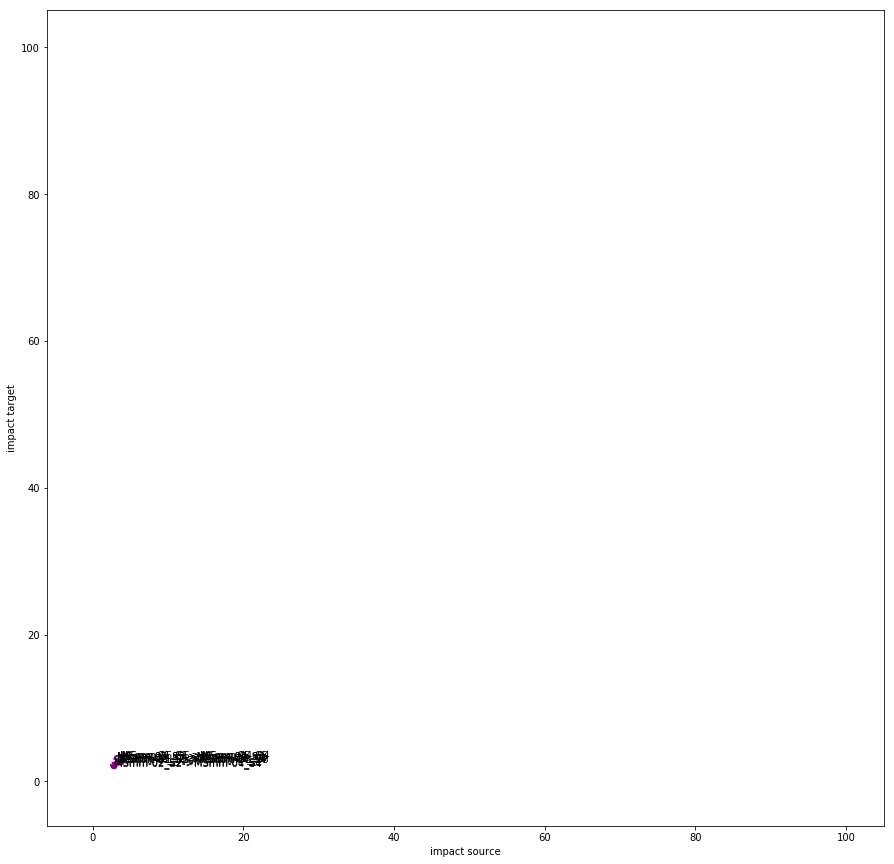

In [23]:
plotfile = outfile.replace(".xlsx", "-all.pdf")
makeScatter(df_shared["impact_source"], df_shared["impact_target"], df_shared['txt'], df_shared['color'], "impact source", "impact target", plotfile)

In [24]:
# Only show things that are different
df_shared_filter = df_shared.copy()
df_shared_filter = df_shared_filter[df_shared_filter["Same patient"] == "different"]
cols = ["source", "target", "impact_source", "impact_target", "Same patient", "txt", "color"]
df_shared_filter = df_shared_filter[cols]
df_shared_filter = df_shared_filter.reset_index()
df_shared_filter.head()

,index,source,target,impact_source,impact_target,Same patient,txt,color


Wrote runMaria-mouse-IGH-MOUSE-shared-clones-different-ids.pdf to disk


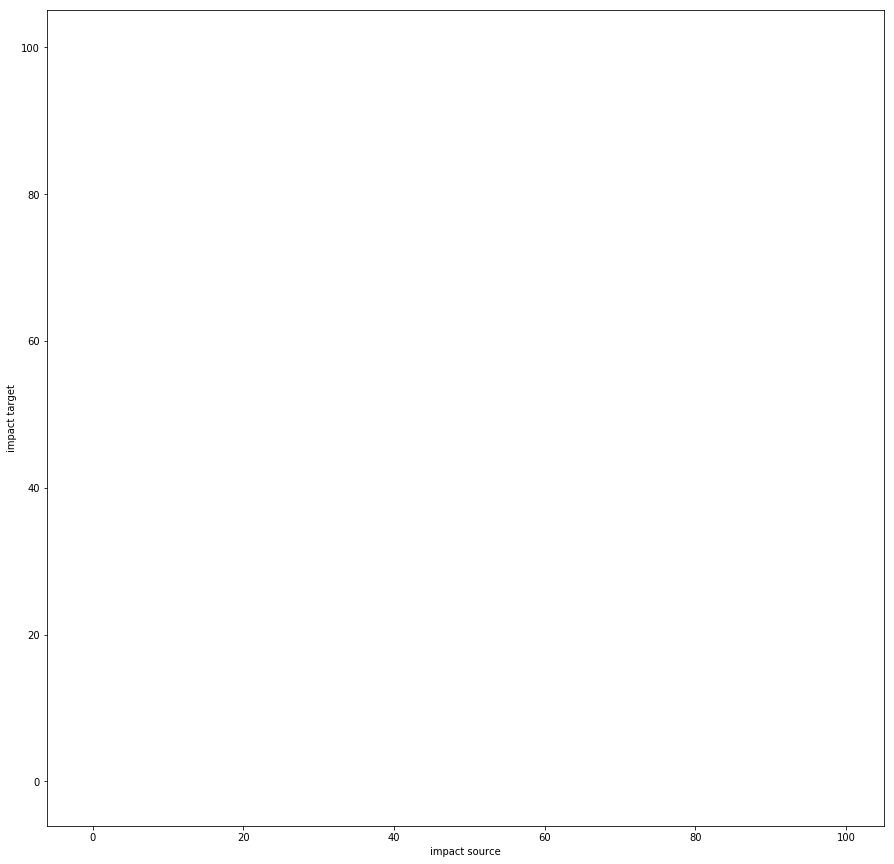

In [25]:
plotfile = outfile.replace(".xlsx", "-different-ids.pdf")
makeScatter(df_shared_filter["impact_source"], df_shared_filter["impact_target"], df_shared_filter['txt'], df_shared_filter['color'], "impact source", "impact target", plotfile)